In [44]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv
import pylab
from scipy.interpolate import interp1d


np.set_printoptions(threshold=sys.maxsize)


In [45]:
dt_array = []
f_array = []
ratio_array = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_ConvergenceCompactDAE_size5.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            dt_array.append(dt)

            f_array.append(row['fmax'])
            ratio_array.append(row['ratio_addition'])

dt_array = np.asarray(dt_array, dtype=np.float64)
f_array = np.asarray(f_array, dtype=np.float64)
ratio_array = np.asarray(ratio_array, dtype=np.float64)


In [49]:
dt_array_ext = []
f_array_ext = []
ratio_array_ext = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_ConvergenceExtendedDAE_size5.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            dt_array_ext.append(dt)

            f_array_ext.append(row['fmax'])
            ratio_array_ext.append(row['ratio_addition'])

dt_array_ext = np.asarray(dt_array_ext, dtype=np.float64)
f_array_ext = np.asarray(f_array_ext, dtype=np.float64)
ratio_array_ext = np.asarray(ratio_array_ext, dtype=np.float64)


In [50]:
dt_array_ext_onlyPSI = []
f_array_ext_onlyPSI = []
ratio_array_ext_onlyPSI = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_ConvergenceExtendedDAE_size5_errorInPSI.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            dt_array_ext_onlyPSI.append(dt)

            f_array_ext_onlyPSI.append(row['fmax'])
            ratio_array_ext_onlyPSI.append(row['ratio_addition'])

dt_array_ext_onlyPSI = np.asarray(dt_array_ext_onlyPSI, dtype=np.float64)
f_array_ext_onlyPSI = np.asarray(f_array_ext_onlyPSI, dtype=np.float64)
ratio_array_ext_onlyPSI = np.asarray(ratio_array_ext_onlyPSI, dtype=np.float64)


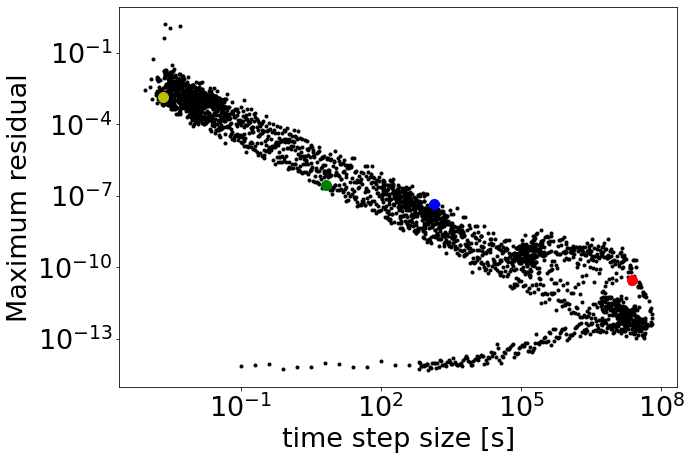

In [29]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(dt_array, f_array,'.k')
plt.plot(2.35e7, 2.76646e-11,'.r',markersize=20)
plt.plot(1.38e3, 4.67457e-8,'.b',markersize=20)
plt.plot(6.76, 2.92325e-7,'.g',markersize=20)
plt.plot(0.00220, 0.00141596155,'.y',markersize=20)

plt.xlabel("time step size [s]")
plt.ylabel("Maximum residual")

plt.xscale('log')
plt.yscale('log')

plt.savefig('../results/TANDEMConvergenceAnalysisCompactDAEMaxResidual_Size5.png', format='png',dpi=300, bbox_inches='tight')

plt.show()

0.0022077560424804688


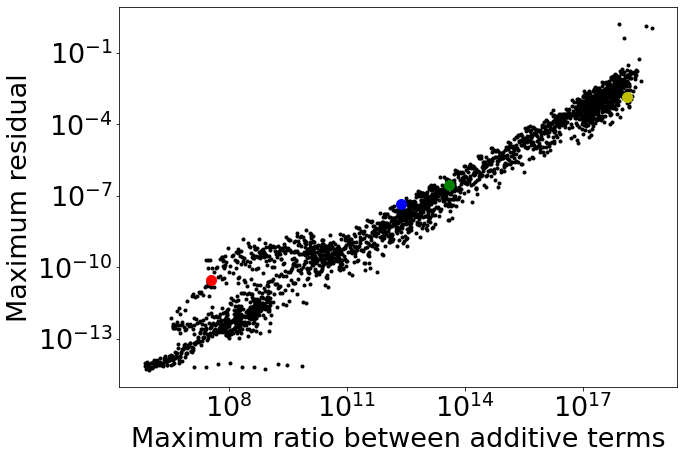

In [30]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(ratio_array, f_array,'.k')

plt.xlabel("Maximum ratio between additive terms")
plt.ylabel("Maximum residual")
plt.plot(36445627, 2.76646e-11,'.r',markersize=20)
plt.plot(2429782450503, 4.67457e-8,'.b',markersize=20)
plt.plot(38664475697551, 2.92325e-7,'.g',markersize=20)
plt.plot(1.3260742534905805e+18, 0.00141596155,'.y',markersize=20)
print(dt_array[2193])
plt.xscale('log')
plt.yscale('log')

plt.savefig('../results/TANDEMConvergenceAnalysisCompactDAERatioInAddition_Size5.png', format='png',dpi=300, bbox_inches='tight')

plt.show()

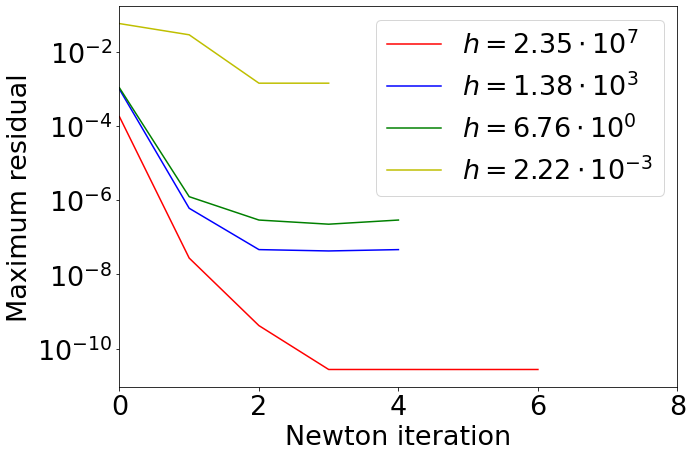

In [31]:
residual_dt2_35e7 =  [ 0.000177634, 2.76858e-08, 4.20183e-10, 2.76681e-11, 2.76575e-11, 2.76326e-11, 2.76646e-11]
residual_dt1380 =    [0.000970067, 6.06753e-07, 4.67457e-08, 4.30079e-08, 4.67457e-08]  #1351
residual_dt6_76 =    [0.00106449, 1.24484e-06, 2.92325e-07, 2.26077e-07, 2.92325e-07]   #1813
residual_dt0_00221 = [0.0570288,  0.0284496, 0.00141596, 0.00141596]                    #2193

plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(residual_dt2_35e7,'r',label=r'$h=2.35\cdot10^7$')
plt.plot(residual_dt1380,'b',label=r'$h=1.38\cdot10^3$')
plt.plot(residual_dt6_76,'g',label=r'$h=6.76\cdot10^0$')
plt.plot(residual_dt0_00221,'y',label=r'$h=2.22\cdot10^{-3}$')

plt.xlabel("Newton iteration")
plt.ylabel("Maximum residual")
plt.yscale('log')
plt.xlim([0,8])
plt.legend()

plt.savefig('../results/TANDEMConvergenceAnalysisCompactDAENewton_Size5.png', format='png',dpi=300, bbox_inches='tight')

plt.show()

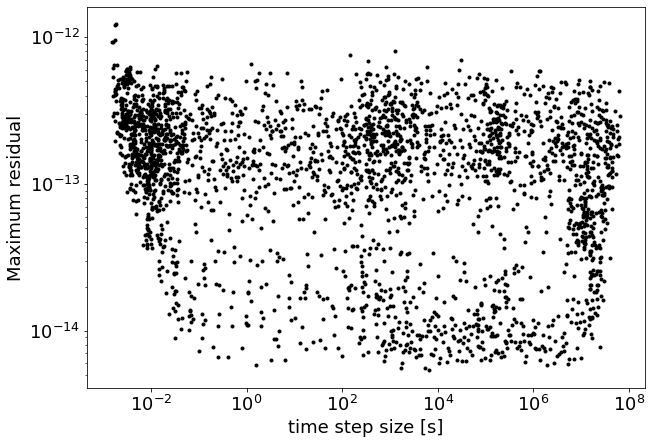

In [32]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})

plt.plot(dt_array_ext, f_array_ext,'.k')

plt.xlabel("time step size [s]")
plt.ylabel("Maximum residual")

plt.xscale('log')
plt.yscale('log')

plt.savefig('../results/TANDEMConvergenceAnalysisExtendedDAEMaxResidual_Size5.png', format='png',dpi=300, bbox_inches='tight')

plt.show()

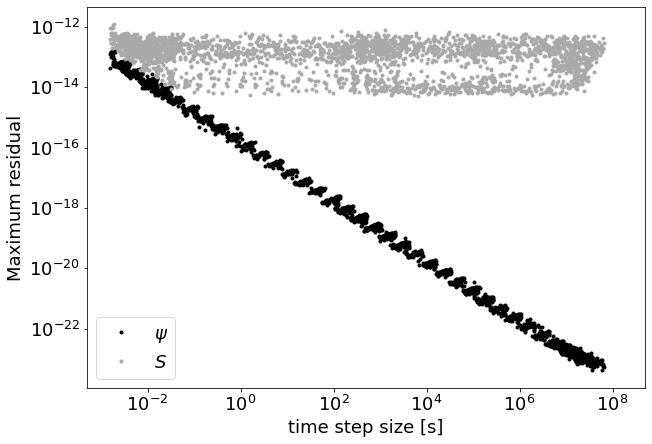

In [62]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})

plt.plot(dt_array_ext_onlyPSI, f_array_ext_onlyPSI,'.k', label=r'$\psi$')
plt.plot(dt_array_ext, f_array_ext,'.', Color='darkgrey', label=r'$S$')

plt.xlabel("time step size [s]")
plt.ylabel("Maximum residual")

plt.xscale('log')
plt.xlim([5e-4, 5e8])
plt.yscale('log')
plt.legend()

plt.savefig('../results/TANDEMConvergenceAnalysisExtendedDAEMaxResidual_Size5_onlyPSI.png', format='png',dpi=300, bbox_inches='tight')

plt.show()